# Making Sense Out of Pokédex – A Short Research on Pokémon Statistics #

Using Python and pandas for data analysis, the aim of this Jupyter Notebook is to uncover interesting insights from Pokémon datasets. While primarily designed as a practical exercise for university training, the project also serves as an opportunity to explore and present information in a visually engaging manner.

## Content ##
First, necessary python libraries are imported along with the 'Pokemon.csv' file.

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.display.max_rows = 200
pokemon_df = pd.read_csv('Pokemon.csv', delimiter=",", encoding='utf-8')
pokemon_df = pokemon_df.rename(columns={'Type 1': 'Type', 'Type 2': 'Weakness'})
pokemon_df

,#,Name,Type,Weakness,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


Second, a historiogram is being created which overviews the content of Pokémon dataset.

array([[<Axes: title={'center': '#'}>, <Axes: title={'center': 'Total'}>,
        <Axes: title={'center': 'HP'}>],
       [<Axes: title={'center': 'Attack'}>,
        <Axes: title={'center': 'Defense'}>,
        <Axes: title={'center': 'Sp. Atk'}>],
       [<Axes: title={'center': 'Sp. Def'}>,
        <Axes: title={'center': 'Speed'}>,
        <Axes: title={'center': 'Generation'}>]], dtype=object)

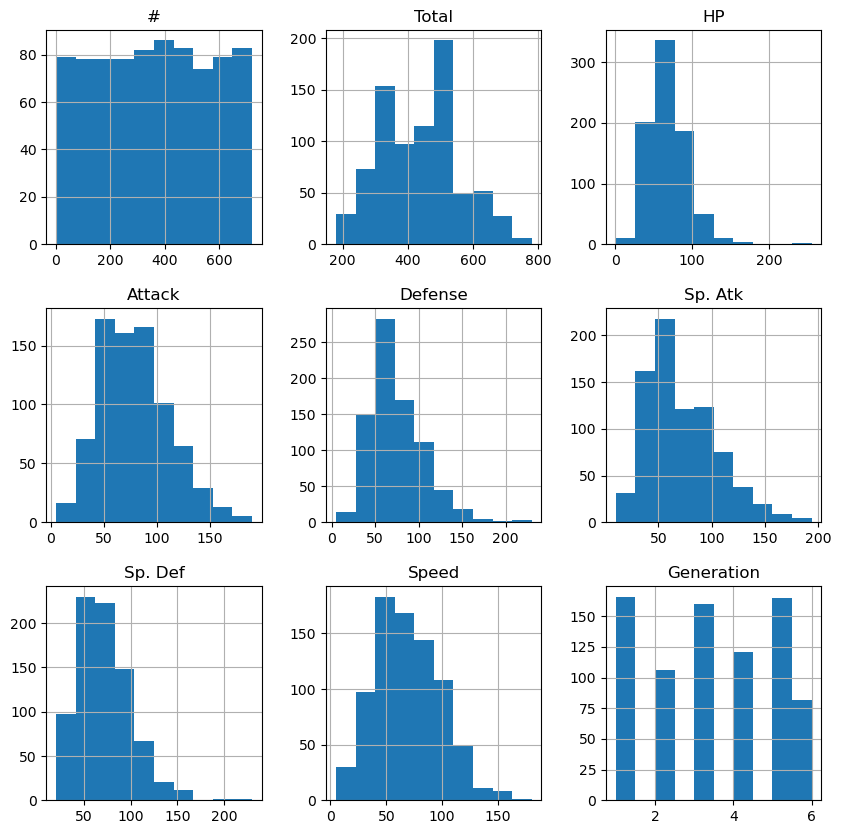

In [6]:
pokemon_df.hist(figsize=(10,10))

### Below are the visuals that are the subject of the project. ###

- This portion of code creates a plot with the number of Pokémons for each Pokémon type.

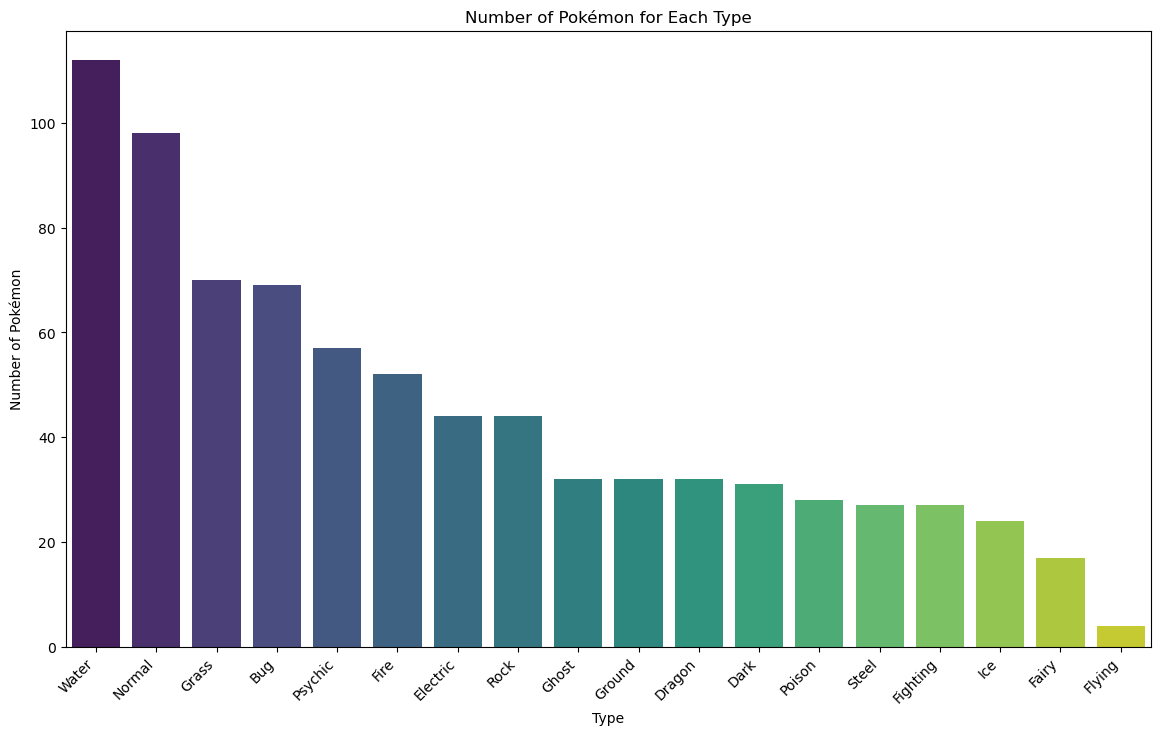

In [28]:
type_counts = pokemon_df['Type'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(14, 8))
sns.countplot(x='Type', data=pokemon_df, order=type_counts.index, palette='viridis')
plt.title('Number of Pokémon for Each Type')
plt.xlabel('Type')
plt.ylabel('Number of Pokémon')
plt.xticks(rotation=45, ha='right')
plt.show()

- Here TOP 3 Pokémons out of every category are shown.

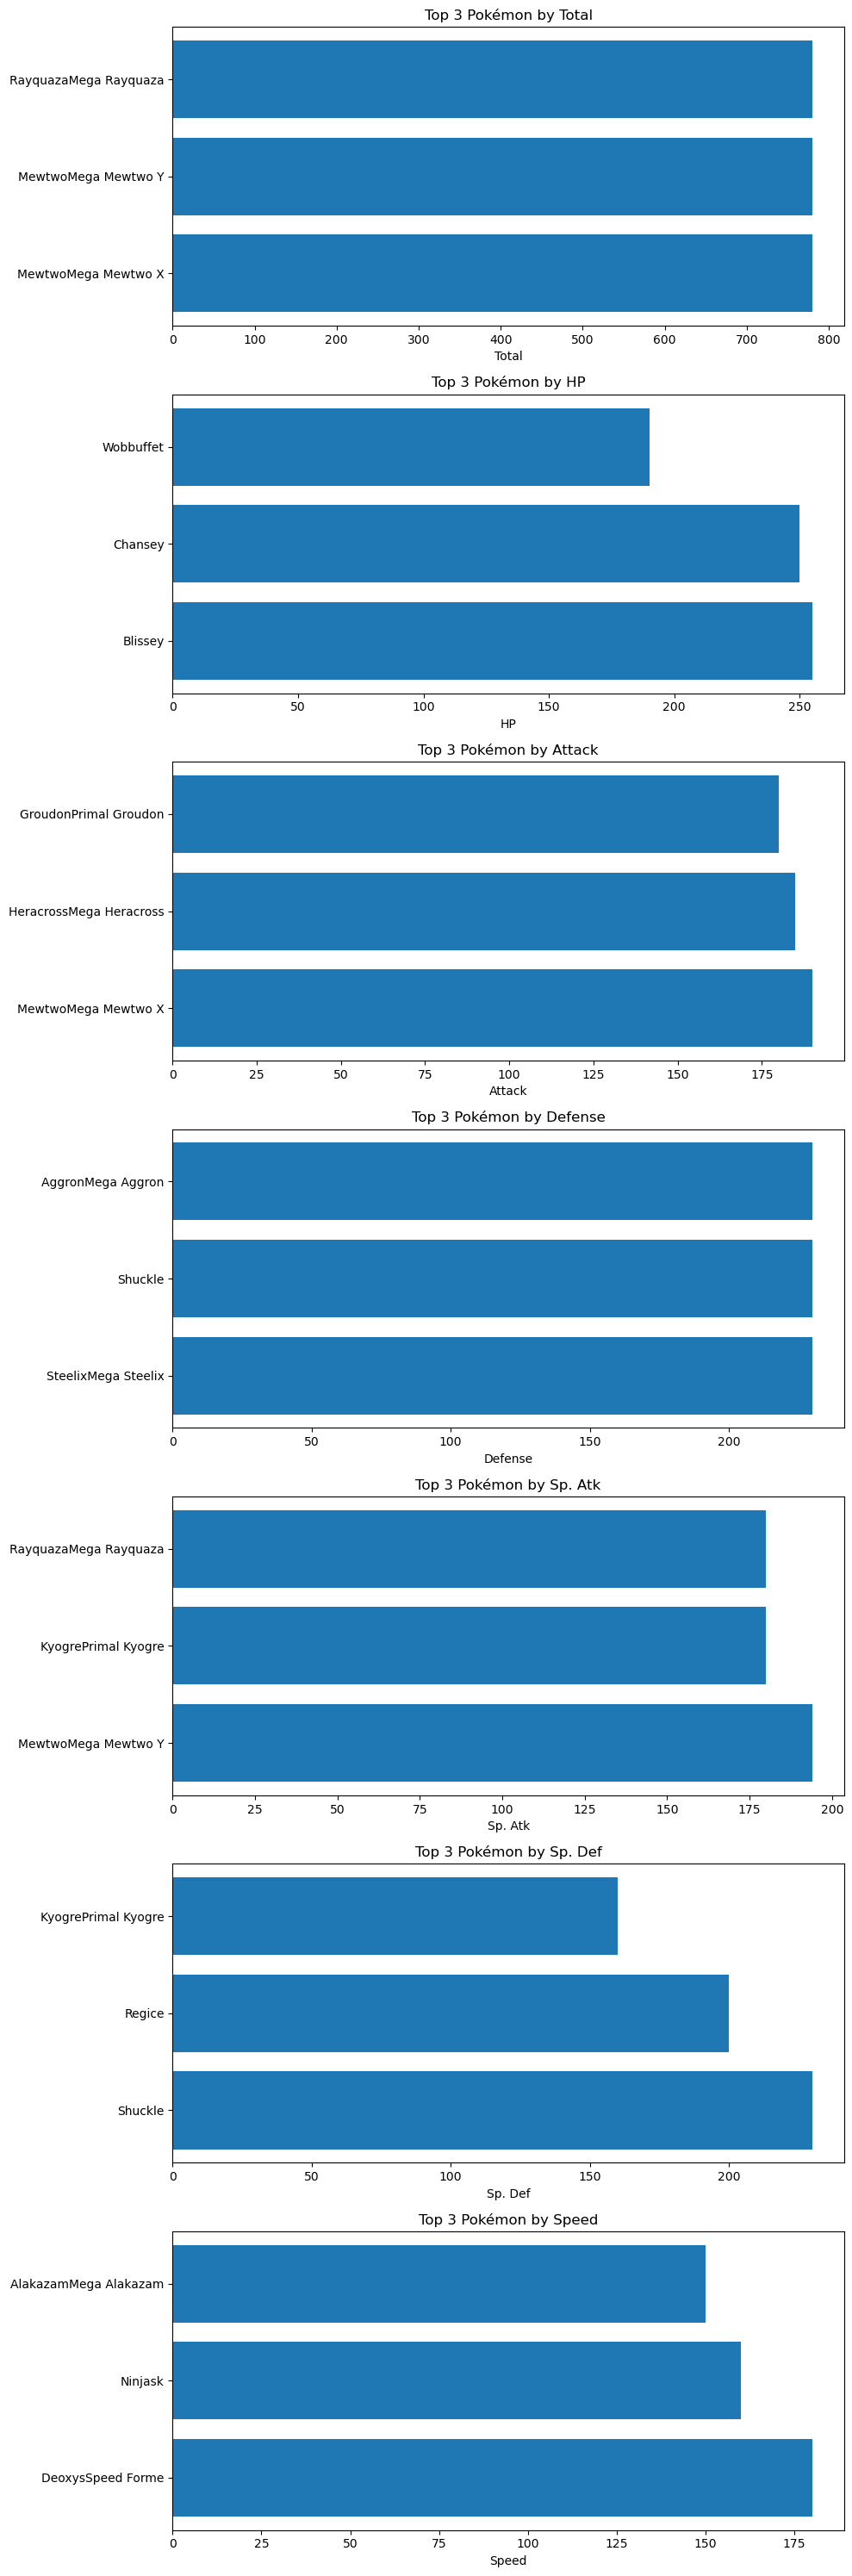

In [11]:
categories = ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

fig, axs = plt.subplots(len(categories), figsize=(10, 30))

for i, category in enumerate(categories):
    top_pokemon = pokemon_df.nlargest(3, category)
    axs[i].barh(top_pokemon['Name'], top_pokemon[category])
    axs[i].set_title(f'Top 3 Pokémon by {category}')
    axs[i].set_xlabel(category)

plt.tight_layout()
plt.show()

- With this code the Pokémons with the highest "Total" score out of every "Type" and "Weakness" are given.

In [16]:
pokemon_df['Total'] = pokemon_df['Total'].astype(int)

# Find the indices of the rows with the maximum 'Total' for each combination of 'Type' and 'Weakness'
max_total_indices = pokemon_df.groupby(['Type', 'Weakness'])['Total'].idxmax()

# Use the indices to get the corresponding rows
pokemon_max_total = pokemon_df.loc[max_total_indices]

# Display the result
print(pokemon_max_total)

       #                       Name      Type  Weakness  Total   HP  Attack  \
657  596                 Galvantula       Bug  Electric    472   70      77   
232  214    HeracrossMega Heracross       Bug  Fighting    600   80     185   
698  637                  Volcarona       Bug      Fire    550   85      60   
137  127          PinsirMega Pinsir       Bug    Flying    600   65     155   
316  292                   Shedinja       Bug     Ghost    236    1      90   
602  542                   Leavanny       Bug     Grass    500   75     103   
459  413        WormadamSandy Cloak       Bug    Ground    424   60      79   
19    15      BeedrillMega Beedrill       Bug    Poison    495   65     150   
230  213                    Shuckle       Bug      Rock    505   20      10   
229  212          ScizorMega Scizor       Bug     Steel    600   70     150   
307  283                    Surskit       Bug     Water    269   40      30   
696  635                  Hydreigon      Dark    Dra

- Later, this data is visualised. 

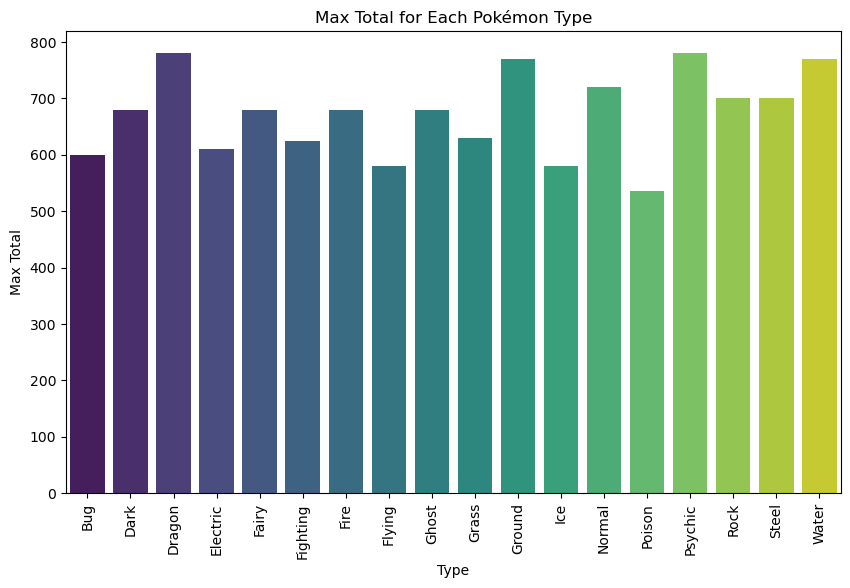

In [12]:
grouped_data = pokemon_df.groupby('Type')['Total'].max()

plt.figure(figsize=(10, 6))
sns.barplot(x=grouped_data.index, y=grouped_data.values, palette='viridis')

plt.xlabel('Type')
plt.ylabel('Max Total')
plt.title('Max Total for Each Pokémon Type')
plt.xticks(rotation=90)

plt.show()

- Want to know what are the "Weakness" of the thoughest Pokémons out of every "Type"? Look no further, you are in the right place.

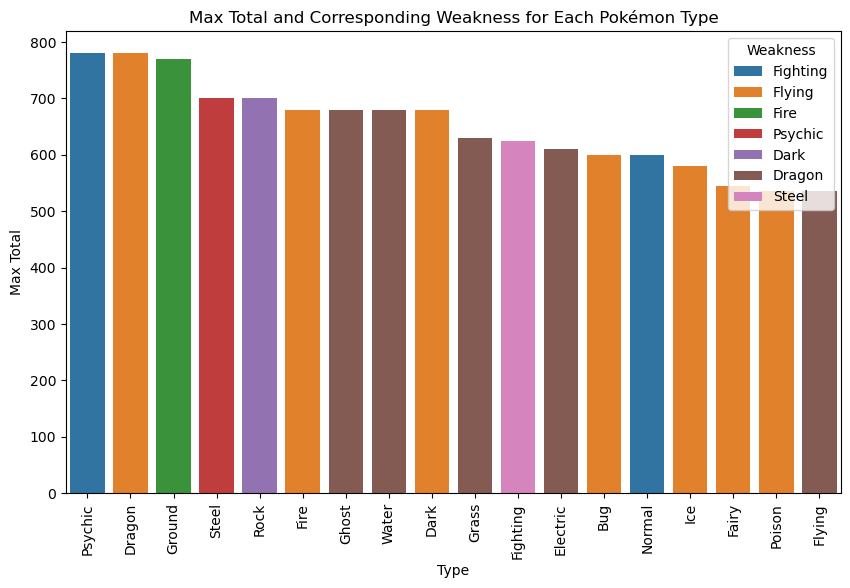

In [21]:
import seaborn as sns

pokemon_max_total = pokemon_max_total.sort_values('Total', ascending=False)

pokemon_max_total = pokemon_max_total.drop_duplicates(subset='Type', keep='first')

plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='Type', y='Total', hue='Weakness', data=pokemon_max_total, dodge=False)

plt.xlabel('Type')
plt.ylabel('Max Total')
plt.title('Max Total and Corresponding Weakness for Each Pokémon Type')
plt.xticks(rotation=90)

plt.show()

- Now, let see does any patterns changes if we look only at Legendary Pokémons.

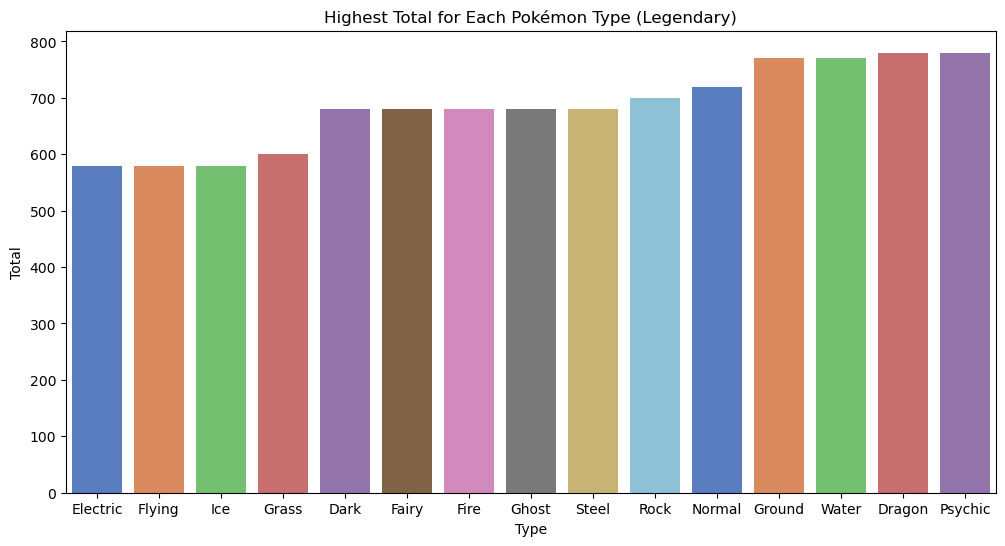

In [29]:
legendary_pokemon_df = pokemon_df[pokemon_df['Legendary'] == True]

max_total_indices_legendary = legendary_pokemon_df.groupby('Type')['Total'].idxmax()

pokemon_max_total_legendary = legendary_pokemon_df.loc[max_total_indices_legendary]

pokemon_max_total_legendary = pokemon_max_total_legendary.sort_values(by='Total')

plt.figure(figsize=(12, 6))
sns.barplot(x='Type', y='Total', data=pokemon_max_total_legendary, palette='muted')
plt.title('Highest Total for Each Pokémon Type (Legendary)')
plt.xlabel('Type')
plt.ylabel('Total')
plt.show()

- What about Non-Legendary Pokémons?

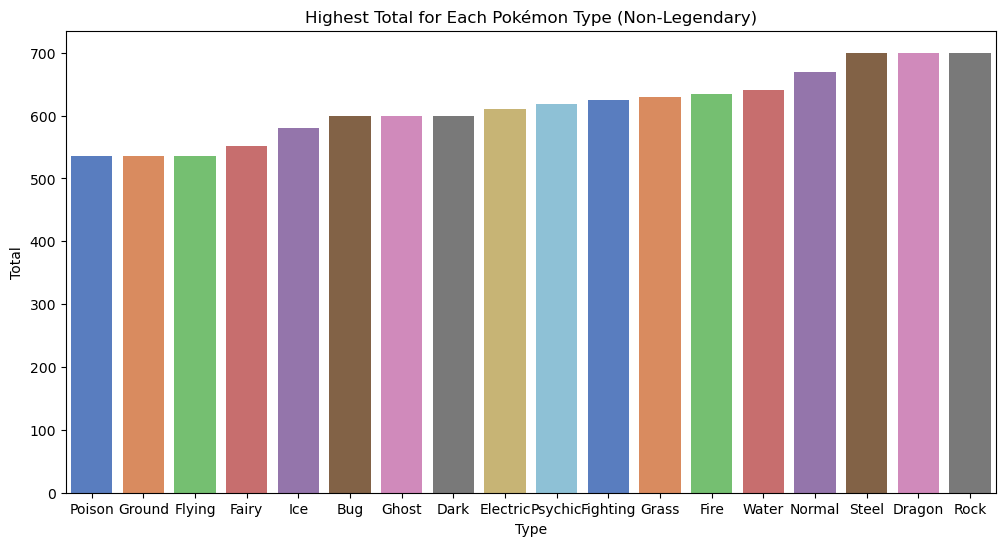

In [30]:
non_legendary_pokemon_df = pokemon_df[pokemon_df['Legendary'] == False]

max_total_indices_non_legendary = non_legendary_pokemon_df.groupby('Type')['Total'].idxmax()

pokemon_max_total_non_legendary = non_legendary_pokemon_df.loc[max_total_indices_non_legendary]

pokemon_max_total_non_legendary = pokemon_max_total_non_legendary.sort_values(by='Total')

plt.figure(figsize=(12, 6))
sns.barplot(x='Type', y='Total', data=pokemon_max_total_non_legendary, palette='muted')
plt.title('Highest Total for Each Pokémon Type (Non-Legendary)')
plt.xlabel('Type')
plt.ylabel('Total')
plt.show()

- Now, let show how the Total Score varies between Legendary and Non-Legendary Pokémons.

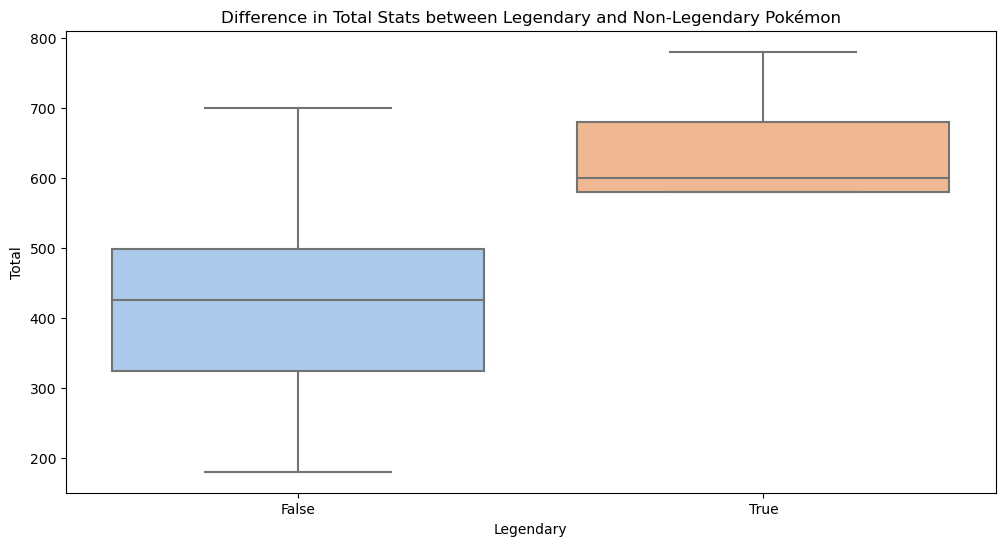

In [26]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Legendary', y='Total', data=pokemon_df, palette='pastel')
plt.title('Difference in Total Stats between Legendary and Non-Legendary Pokémon')
plt.xlabel('Legendary')
plt.ylabel('Total')
plt.show()

- At the end, let see how Total Score changes over Pokémons generations.

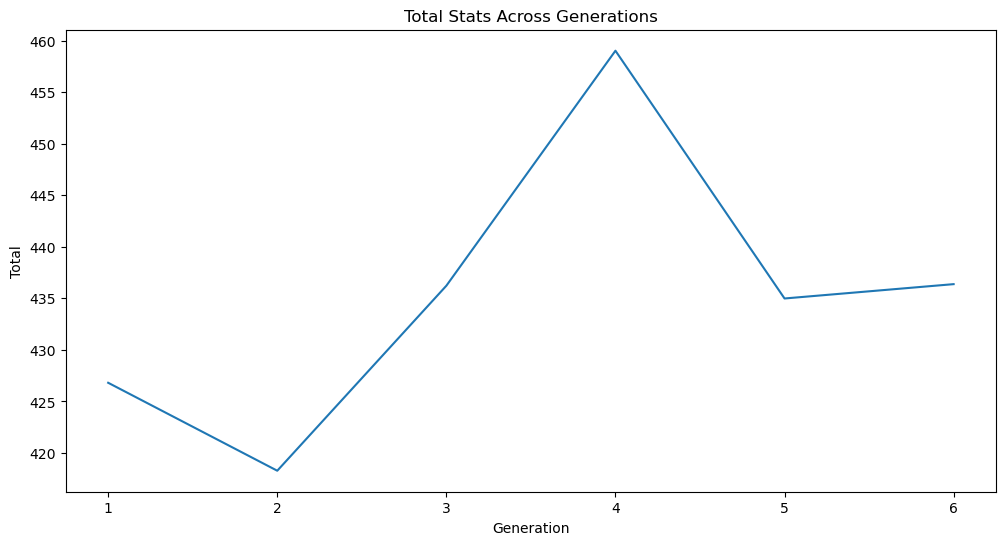

In [23]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Generation', y='Total', data=pokemon_df, err_style=None)
plt.title('Total Stats Across Generations')
plt.xlabel('Generation')
plt.ylabel('Total')
plt.show()

## THE END ##